# Trained model summary

This notebook contains a summary over all trained CNNs

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import os

main_path = '/fhgfs/users/jbehnken/01_Data/04_Models'

In [2]:
models = []
for folder in os.listdir(main_path):
    data = []
    name =  folder.split('_', 1)[-1]
    
    c = 0
    f = 0
    for letter in name:
        if letter=='c': c+=1
        if letter=='f': f+=1
    name_new = str(c)+'c_'+str(f)+'f'
    
    data.append(name_new)
    path = os.path.join(main_path, folder, name+'_Hyperparameter.csv')
    
    df = pd.read_csv(path)
    data.extend(df[df['Auc']==df['Auc'].max()].values.tolist()[0])
    
    modified_time = int(os.stat(path).st_mtime)
    date = time.localtime(modified_time)[0:6]
    data.extend(date)
    models.append(data)
    
df = pd.DataFrame(models, columns=['Name', 'Learning_Rate', 'Batch_Size', 'Patch_Size', 'Depth', 'Hidden_Nodes', 'Accuracy', 'Auc', 'Steps', 'Early_Stopped', 'Time', 'Title', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Second'])
df = df[['Name', 'Auc', 'Accuracy', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Second', 'Learning_Rate', 'Batch_Size', 'Patch_Size', 'Depth', 'Hidden_Nodes', 'Steps', 'Early_Stopped', 'Time', 'Title']].sort_values(by='Auc', ascending=False)


df

,Name,Auc,Accuracy,Year,Month,Day,Hour,Minute,Second,Learning_Rate,Batch_Size,Patch_Size,Depth,Hidden_Nodes,Steps,Early_Stopped,Time,Title
9,3c_3f,0.982296,94.400012,2017,7,7,12,1,18,0.001,209,3,"[8, 18, 25]","[59, 59]",100000,False,2888.275131,103_with_5_100_pre_flat
4,3c_3f,0.961342,90.640008,2017,7,3,16,47,26,0.001,241,5,9,36,500000,False,9460.033835,Plotting_cccdfdfdf
2,3c_2f,0.956064,90.890014,2017,6,28,13,0,34,0.001,143,5,26,13,211000,True,5216.618046,Dropout
1,4c_3f,0.954281,89.940012,2017,6,28,14,11,1,0.001,215,3,8,234,287000,True,3689.826215,Dropout
12,3c_1f,0.952376,90.550005,2017,6,26,4,31,48,0.001,180,3,9,138,50000,False,672.932741,Random_Plotting
13,4c_1f,0.951235,90.370017,2017,6,25,13,30,14,0.001,178,3,10,208,50000,False,462.173625,Random_Plotting
10,5c_2f,0.950604,90.590006,2017,6,26,1,31,47,0.001,135,5,8,157,50000,False,1287.778864,Random_Plotting
8,5c_3f,0.950544,89.620012,2017,6,27,0,43,28,0.001,189,3,12,27,50000,False,815.150183,Random_Plotting
14,5c_1f,0.949882,90.690017,2017,6,26,6,52,18,0.001,166,3,8,202,50000,False,690.395214,Random_Plotting
0,4c_2f,0.949312,89.420003,2017,6,25,16,39,2,0.001,244,3,8,124,47000,True,916.823063,Random_Plotting


1.0    873
2.0    139
0.0      5
Name: Accuracy, dtype: int64


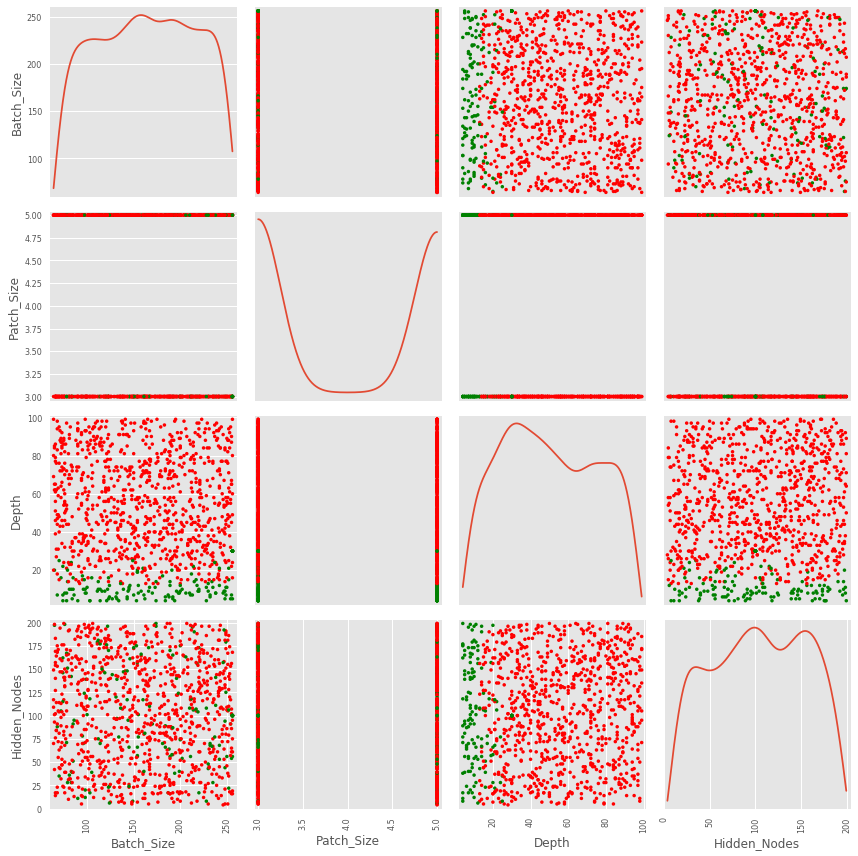

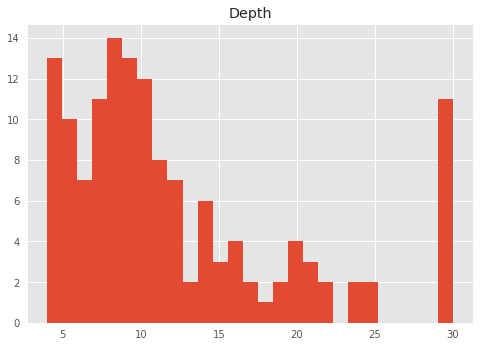

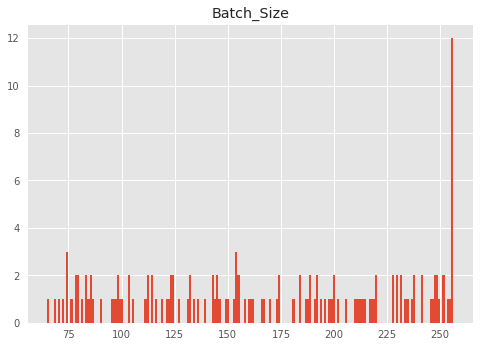

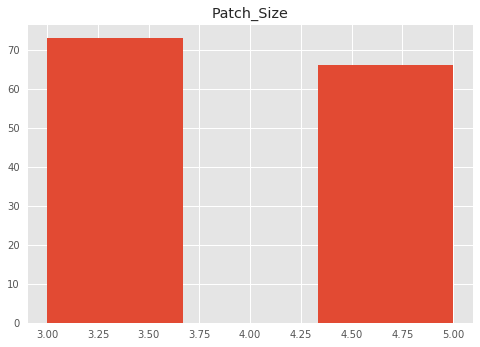

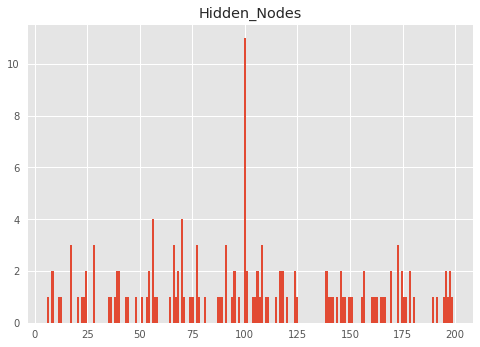

In [5]:
df = pd.read_csv('/fhgfs/users/jbehnken/01_Data/04_Models/13_cccfff/cccfff_Hyperparameter.csv')
df = df[df['Title']=='Starting_Test']
print(df['Accuracy'].value_counts())

color_wheel = {1: 'r', 
               2: 'g',}
colors = df['Early_Stopped'].map(lambda x: color_wheel.get(x + 1))

plt.style.use('ggplot')
pd.plotting.scatter_matrix(df[['Batch_Size', 'Patch_Size', 'Depth', 'Hidden_Nodes']], color=colors, diagonal='kde', alpha=1, figsize=(12,12))
plt.tight_layout()
plt.show()


for column in ['Depth', 'Batch_Size', 'Patch_Size', 'Hidden_Nodes']:
    min_depth = df[df['Early_Stopped']==True][column].min()
    max_depth = df[df['Early_Stopped']==True][column].max()
    bins = max_depth - min_depth + 1

    df[df['Early_Stopped']==True][column].hist(bins=bins)
    plt.title(column)
    plt.show()

In [13]:
liste = sorted(count_dict.items(), key=operator.itemgetter(1), reverse=True)


for i in range(100):
    if liste[i][0]<=60:
        scheibe = liste[i][0]
        break
        
# Cuts 7 frames for the final image
lower = scheibe-33
upper =  scheibe-26

print(lower, upper)
scheibe-30

19 26


22

In [5]:
path = '/fhgfs/users/jbehnken/01_Data/04_Models/16_pre-cccfff/pre-cccfff_Hyperparameter.csv'
df = pd.read_csv(path)
df.tail()

,Learning_Rate,Batch_Size,Patch_Size,Depth,Hidden_Nodes,Accuracy,Auc,Steps,Early_Stopped,Time,Title
136,0.001,239,5,"[5, 12, 18]","[34, 34]",92.890006,0.975095,100000,False,2466.409865,137_with_5_100_pre_flat_c
137,0.001,192,5,"[5, 13, 18]","[53, 53]",93.010008,0.975482,100000,False,2106.153036,138_with_5_100_pre_flat_c
138,0.001,238,3,"[4, 12, 20]","[15, 15]",91.390008,0.965938,100000,False,2040.711342,139_with_5_100_pre_flat_c
139,0.001,226,3,"[10, 16, 20]","[24, 24]",92.540008,0.971685,100000,False,2783.908954,140_with_5_100_pre_flat_c
140,0.001,92,3,"[10, 14, 19]","[55, 55]",92.440003,0.970308,100000,False,1859.917625,141_with_5_100_pre_flat_c
